In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv("Customer_data - customer_data.csv")  # Replace with actual file
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [11]:
# 4.1 Data Exploration and Preprocessing - A data exploration and preprocessing notebook or report that analyzes the dataset,
handles missing values, and prepares the data for modeling.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Customer_data - customer_data.csv") 

# Initial Exploration
print(df.shape)
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

# Handling 'TotalCharges' if stored as string with spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode binary variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Final shape after preprocessing
print(df.head())
print("Final shape:", df.shape)


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_2640\377230458.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Sample Predictions:
Predicted: Yes, Actual: Yes
Predicted: No, Actual: No
Predicted: No, Actual: No
Predicted: Yes, Actual: Yes
Predicted: No, Actual: No
Predicted: No, Actual: Yes
Predicted: No, Actual: No
Predicted: No, Actual: No
Predicted: No, Actual: Yes
Predicted: No, Actual: Yes

Top 10 Important Features:
                             Feature  Importance
3                       TotalCharges    0.087841
1                             tenure    0.086679
2                     MonthlyCharges    0.071704
5670         Contract_Month-to-month    0.030653
5677  PaymentMethod_Electronic check    0.023267
5661                  TechSupport_No    0.017894
5655                 OnlineBackup_No    0.017411
5650     InternetService_Fiber optic    0.017378
5654              OnlineSecurity_Yes    0.016235
5652               OnlineSecurity_No    0.016144


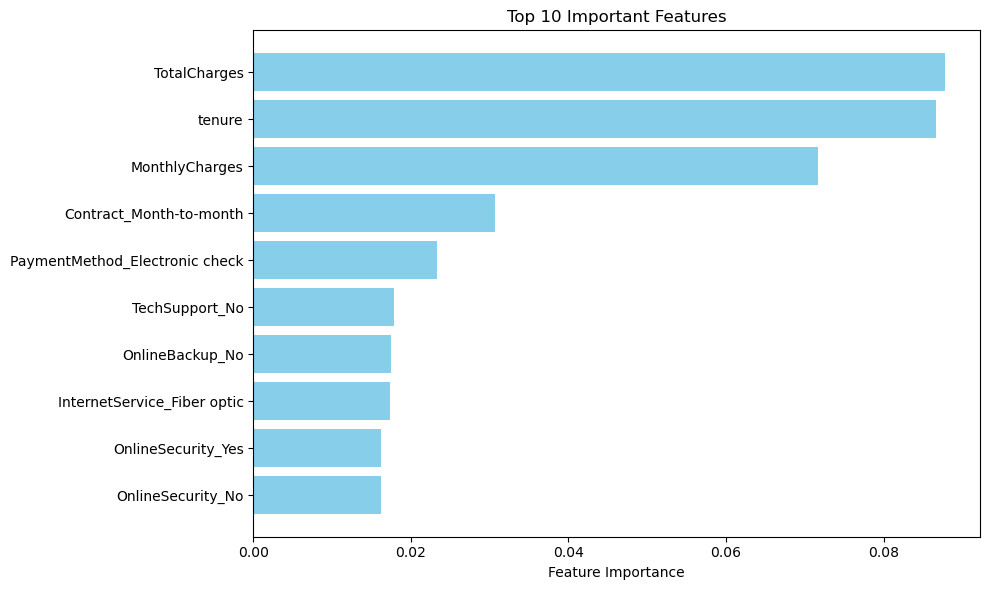

In [6]:
# 4.2 Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer for numeric features
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Add imputer for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that preprocesses the data then applies the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Show a few predictions vs actual values
print("Sample Predictions:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

# For feature importance with categorical variables, we need to get the feature names after one-hot encoding
# This is more complex with the pipeline, so let's extract feature names
feature_names = numeric_features.copy()
# Get one-hot encoded feature names
preprocessor_fitted = pipeline.named_steps['preprocessor']
ohe = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot']  # Updated to access onehot in the pipeline
categorical_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names.extend(categorical_feature_names)

# Get feature importances
importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("\nTop 10 Important Features:")
print(feature_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(feature_df['Feature'].head(10), feature_df['Importance'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

Accuracy: 0.8005677785663591
Precision: 0.6825396825396826
Recall: 0.46112600536193027
F1 Score: 0.5504


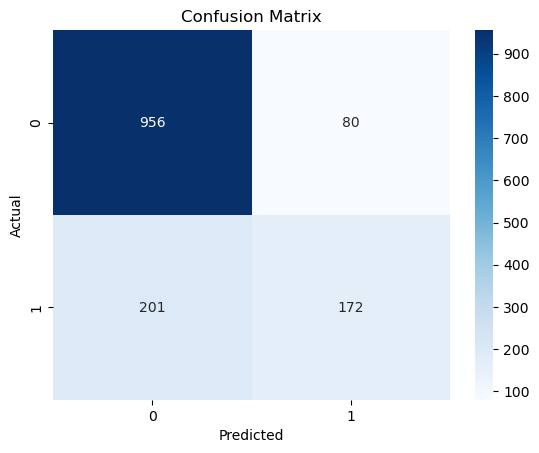


Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.68      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [20]:
#  Model Evaluation - An evaluation of model performance using appropriate metrics (such as accuracy,
precision, recall, F1 score, etc.). 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
# Specify 'Yes' as the positive label for binary classification metrics
print("Precision:", precision_score(y_test, y_pred, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Yes'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='Yes'))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

< a href = "https://drive.google.com/file/d/1tcz9z7Wuhhb7c7kcAugBvLeqGeheFFZi/view?usp=sharing"> video link </a>
